In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import h5py
import os
import time
import pickle

import sceb.data_loader as dl
import sceb.scdd as sd
import scanpy.api as sc

%matplotlib inline
%load_ext autoreload
%autoreload 2

from matplotlib import rcParams

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 10,
   'xtick.labelsize': 13,
   'ytick.labelsize': 13,
   'text.usetex': False,
   'text.usetex': False,
   }
rcParams.update(params)

/home/martin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
output_folder = '/home/martin/single_cell_eb/figures/figure_consistency'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Computation 

In [3]:
## Collect the data
dataset={}
## Collect the data
dataset={}
dataset['brain_1k'] = dl.load_10x_1k() # 1k brain cells 
dataset['brain_2k'] = dl.load_10x_2k() # 2k brain cells 
dataset['brain_9k'] = dl.load_10x_9k() # 9k brain cells 
dataset['brain_1.3m'] = dl.load_10x_1_3mil() # 1.3 million brain cells 
dataset['pbmc_4k'] = dl.load_10x_4k() # 4k PBMC cells
dataset['pbmc_8k'] = dl.load_10x_8k() # 8k PBMC cells 
dataset['3T3_12k'] = dl.load_10x_12k_mix_mouse() # 12k cells 
dataset['3T3_6k'] = dl.load_10x_6k_mix_mouse() # 6k cells
dataset['3T3_1k'] = dl.load_10x_1k_mix_mouse() # 6k cells
dataset['293T_12k'] = dl.load_10x_12k_mix_human() # 12k cells 
dataset['293T_6k'] = dl.load_10x_6k_mix_human() # 6k cells
dataset['293T_1k'] = dl.load_10x_1k_mix_human() # 6k cells

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
Nr_bar_dic = {}

for dname in dataset.keys():
    print(dname)
    Nc,G,Nr,Nr_bar = sd.get_info(dataset[dname])
    Nr_bar_dic[dname] = Nr_bar
    sc.pp.filter_genes(dataset[dname],min_counts=0.1*dataset[dname].shape[0])
    _ = sd.get_info(dataset[dname])

Nr_bar_anchor_pbmc = Nr_bar_dic['pbmc_4k']
Nr_bar_anchor_brain = Nr_bar_dic['brain_9k']
Nr_bar_anchor_nih = Nr_bar_dic['3T3_6k']
Nr_bar_anchor_hek = Nr_bar_dic['293T_6k']

brain_1k
## Nc=931, G=27998, Nr=11531.54, Nr_bar=0.41
## Nc=931, G=8124, Nr=11327.36, Nr_bar=1.39
brain_2k
## Nc=2022, G=27998, Nr=7590.87, Nr_bar=0.27
## Nc=2022, G=7060, Nr=7340.18, Nr_bar=1.04
brain_9k
## Nc=9128, G=27998, Nr=7346.04, Nr_bar=0.26
## Nc=9128, G=7578, Nr=7110.81, Nr_bar=0.94
brain_1.3m
## Nc=1306127, G=27998, Nr=4891.33, Nr_bar=0.17
## Nc=1306127, G=6263, Nr=4621.82, Nr_bar=0.74
pbmc_4k
## Nc=4340, G=33694, Nr=4349.04, Nr_bar=0.13
## Nc=4340, G=4039, Nr=4038.76, Nr_bar=1.00
pbmc_8k
## Nc=8381, G=33694, Nr=4639.05, Nr_bar=0.14
## Nc=8381, G=4329, Nr=4330.41, Nr_bar=1.00
3T3_12k
## Nc=6657, G=27998, Nr=11041.74, Nr_bar=0.39
## Nc=6657, G=6748, Nr=10838.64, Nr_bar=1.61
3T3_6k
## Nc=3427, G=27998, Nr=20132.37, Nr_bar=0.72
## Nc=3427, G=8220, Nr=19972.09, Nr_bar=2.43
3T3_1k
## Nc=516, G=27998, Nr=23030.19, Nr_bar=0.82
## Nc=516, G=8606, Nr=22881.85, Nr_bar=2.66
293T_12k
## Nc=6893, G=32738, Nr=18466.26, Nr_bar=0.56
## Nc=6893, G=8676, Nr=18254.38, Nr_bar=2.10
293T_6k
## Nc

In [5]:
for dname in dataset.keys():
    if 'pbmc' in dname:
        print(dname,Nr_bar_dic[dname]/Nr_bar_anchor_pbmc)
    elif 'brain' in dname:
        print(dname,Nr_bar_dic[dname]/Nr_bar_anchor_brain)
    elif '3T3' in dname:
        print(dname,Nr_bar_dic[dname]/Nr_bar_anchor_nih)
    else:
        print(dname,Nr_bar_dic[dname]/Nr_bar_anchor_hek)

brain_1k 1.5697637686879802
brain_2k 1.0333281958592246
brain_9k 1.0
brain_1.3m 0.6658467387775543
pbmc_4k 1.0
pbmc_8k 1.0666838389791906
3T3_12k 0.5484570353328232
3T3_6k 1.0
3T3_1k 1.1439379785059083
293T_12k 0.5862315044409331
293T_6k 1.0
293T_1k 1.1318447699026004


In [6]:
p0_dd,p0_ml,M_dd,M_ml,gene_list = {},{},{},{},{}
cov_dd,cov_ml = {},{}
PC_dd,PC_ml = {},{}

for dname in dataset.keys():
    print('## processing %s ...'%dname)
    temp = dataset[dname].copy()
    
    ## size_factor
    size_factor = sd.dd_size_factor(temp,verbose=False)
    ## gene_list
    gene_list[dname] = list(temp.var_names) 
    ## dd_moment
    M_ml[dname],M_dd[dname] = sd.dd_1d_moment(temp,size_factor=size_factor)
    ## dd_zero
    if 'pbmc' in dname:
        p0_ml[dname],p0_dd[dname] = sd.dd_inactive_prob(temp,relative_depth=Nr_bar_dic[dname]/Nr_bar_anchor_pbmc,\
                                                    size_factor=size_factor,verbose=False)
    elif 'brain' in dname:
        p0_ml[dname],p0_dd[dname] = sd.dd_inactive_prob(temp,relative_depth=Nr_bar_dic[dname]/Nr_bar_anchor_brain,\
                                                    size_factor=size_factor,verbose=False)
    elif '3T3' in dname:
        p0_ml[dname],p0_dd[dname] = sd.dd_inactive_prob(temp,relative_depth=Nr_bar_dic[dname]/Nr_bar_anchor_nih,\
                                                    size_factor=size_factor,verbose=False)
    else:
        p0_ml[dname],p0_dd[dname] = sd.dd_inactive_prob(temp,relative_depth=Nr_bar_dic[dname]/Nr_bar_anchor_nih,\
                                                    size_factor=size_factor,verbose=False)
    
#     if dname != 'brain_1.3m':
#         mean_ml,cov_ml[dname],PC_ml[dname] = sd.ml_covariance(temp,size_factor=size_factor,verbose=False)
#         mean_dd,cov_dd[dname],PC_dd[dname] = sd.dd_covariance(temp,size_factor=size_factor,verbose=False)
    print('\n')

## change all the gene names to upper-case 
for gl in gene_list.keys():
    temp = gene_list[gl]
    for i in range(len(temp)):
        temp[i] = temp[i].upper()
    gene_list[gl] = temp
    
fname = output_folder+'/data.pickle'
f_myfile = open(fname,'wb')
pickle.dump(M_ml, f_myfile)
pickle.dump(M_dd, f_myfile)
pickle.dump(cov_ml, f_myfile)
pickle.dump(cov_dd, f_myfile)
pickle.dump(PC_ml, f_myfile)
pickle.dump(PC_dd, f_myfile)
pickle.dump(p0_ml, f_myfile)
pickle.dump(p0_dd, f_myfile)
pickle.dump(gene_list, f_myfile)
pickle.dump(Nr_bar_dic, f_myfile)
f_myfile.close()

## processing brain_1k ...
#time start: 0.0s
n_cell=931, n_gene=8124
#total: 0.15s


## processing brain_2k ...
#time start: 0.0s
n_cell=2022, n_gene=7060
#total: 0.25s


## processing brain_9k ...
#time start: 0.0s
n_cell=9128, n_gene=7578
#total: 1.04s


## processing brain_1.3m ...
#time start: 0.0s
n_cell=1306127, n_gene=6263
#total: 108.91s


## processing pbmc_4k ...
#time start: 0.0s
n_cell=4340, n_gene=4039
#total: 0.20s


## processing pbmc_8k ...
#time start: 0.0s
n_cell=8381, n_gene=4329
#total: 0.46s


## processing 3T3_12k ...
#time start: 0.0s
n_cell=6657, n_gene=6748
#total: 0.84s


## processing 3T3_6k ...
#time start: 0.0s
n_cell=3427, n_gene=8220
#total: 0.62s


## processing 3T3_1k ...
#time start: 0.0s
n_cell=516, n_gene=8606
#total: 0.12s


## processing 293T_12k ...
#time start: 0.0s
n_cell=6893, n_gene=8676
#total: 1.34s


## processing 293T_6k ...
#time start: 0.0s
n_cell=3550, n_gene=9981
#total: 0.93s


## processing 293T_1k ...
#time start: 0.0s
n_cell=504, n

# Figure generation

In [7]:
fname = output_folder+'/data.pickle'
f_myfile = open(fname, 'rb')
M_ml = pickle.load(f_myfile)
M_dd = pickle.load(f_myfile)
cov_ml = pickle.load(f_myfile)
cov_dd = pickle.load(f_myfile)
PC_ml = pickle.load(f_myfile)
PC_dd = pickle.load(f_myfile)
p0_ml = pickle.load(f_myfile)
p0_dd = pickle.load(f_myfile)
gene_list = pickle.load(f_myfile)
Nr_bar_dic = pickle.load(f_myfile)
f_myfile.close()

In [8]:
def fig_xx_two_data(param1,param2,suffix='',output_folder=''):
    s_ml_1,s_dd_1,gene_list_1,dname_1 = param1
    s_ml_2,s_dd_2,gene_list_2,dname_2 = param2
    
    ## consistency     
    common_gene = set(gene_list_1) & set(gene_list_2)
    idx1 = []
    idx2 = []
    n_gene=0
    for idx,gene in enumerate(common_gene):     
        idx1.append(gene_list_1.index(gene))
        idx2.append(gene_list_2.index(gene))
        n_gene+=1

    plt.figure(figsize=[10,5])
    plt.subplot(121)
    sd.plot_xx(s_ml_1[idx1],s_ml_2[idx2],xlabel=dname_1,ylabel=dname_2,color='navy',logscale=True,s=16,alpha=0.4)
    plt.grid(ls='--')
    plt.title('Plug-in, '+suffix)
    
    plt.subplot(122)
    sd.plot_xx(s_dd_1[idx1],s_dd_2[idx2],xlabel=dname_1,ylabel=dname_2,color='orange',logscale=True,s=16,alpha=0.4)
    plt.title('EB, '+suffix)
    plt.grid(ls='--')
    plt.tight_layout()
    plt.savefig(output_folder+'/two_data_%s_%s_%s.png'%(dname_1,dname_2,suffix))
    plt.savefig(output_folder+'/two_data_%s_%s_%s.pdf'%(dname_1,dname_2,suffix))    
    plt.show()

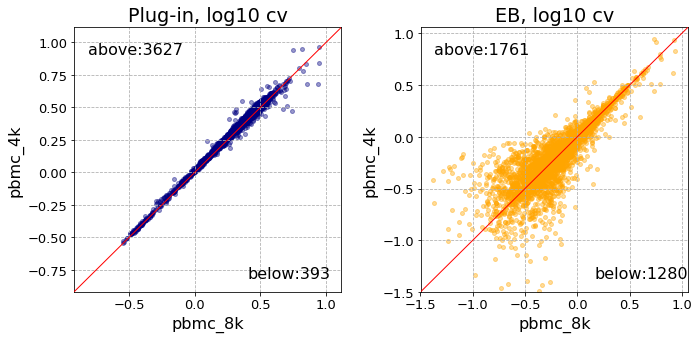

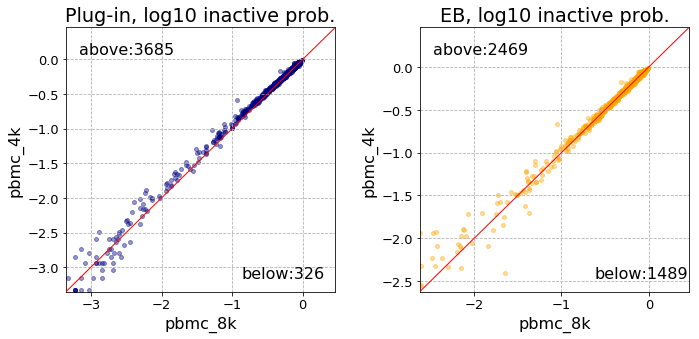

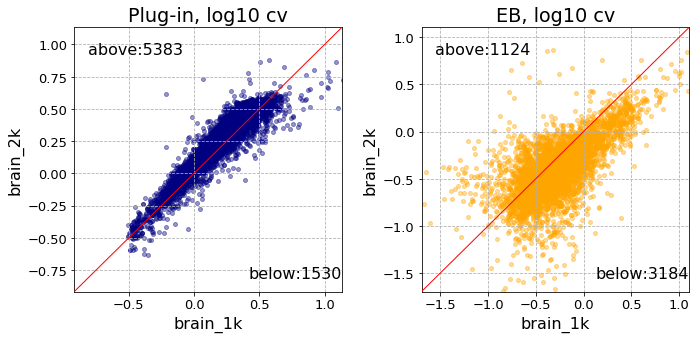

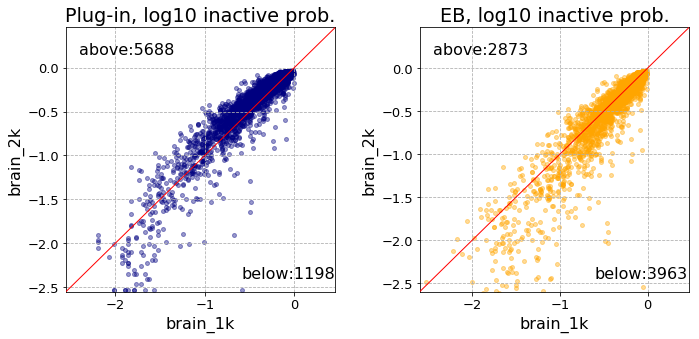

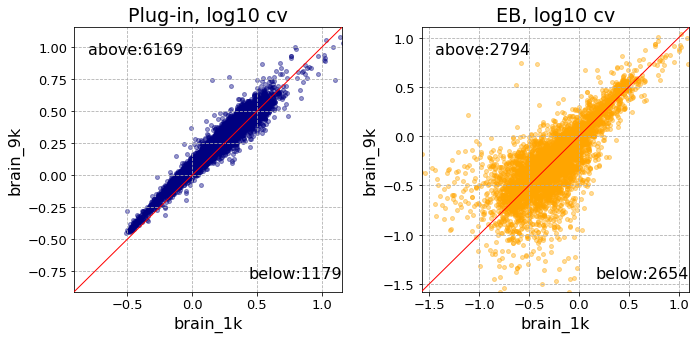

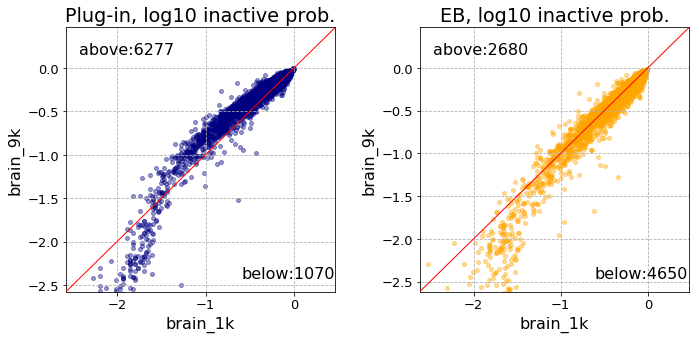

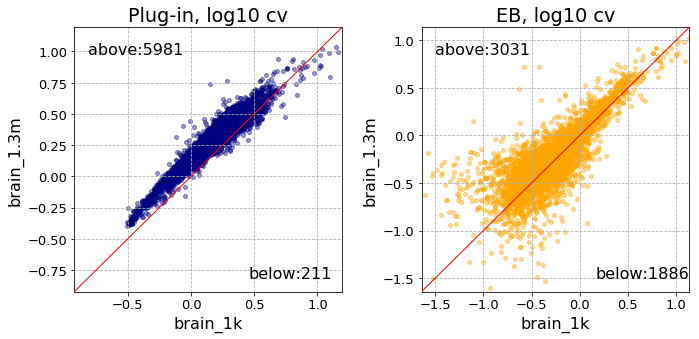

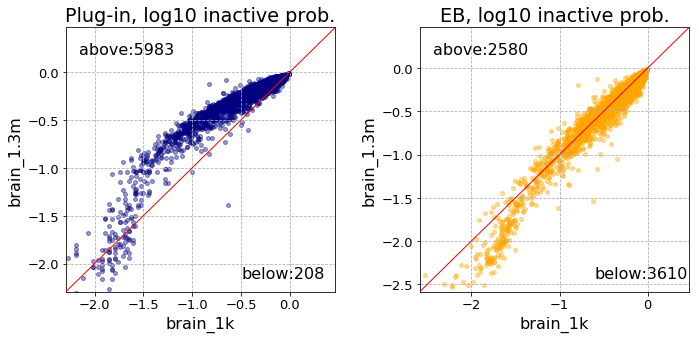

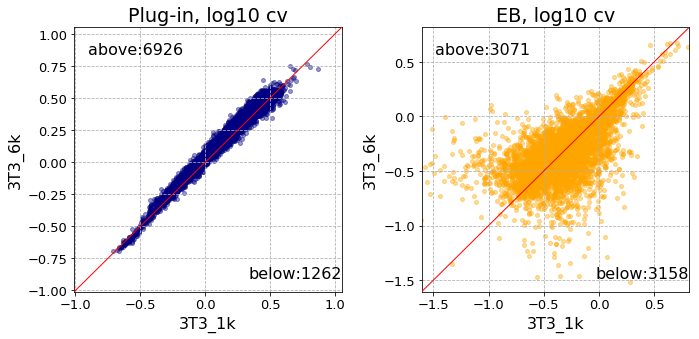

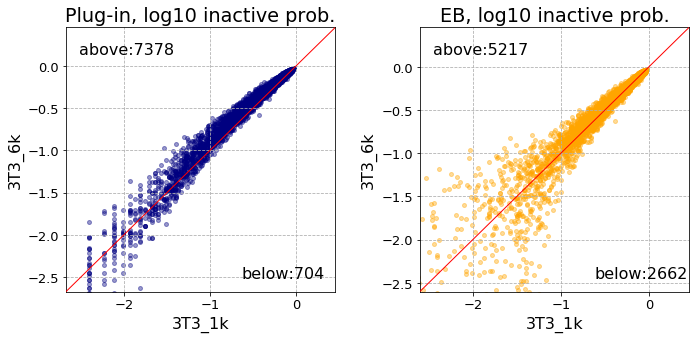

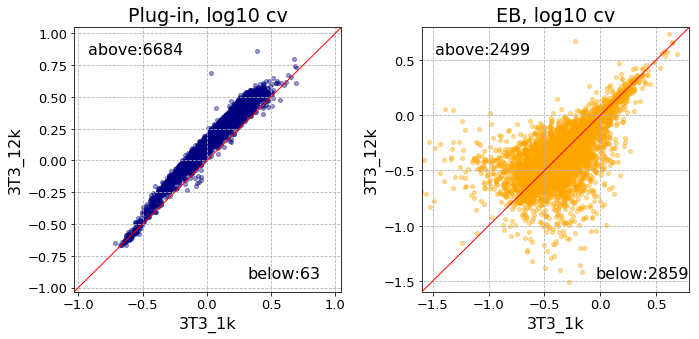

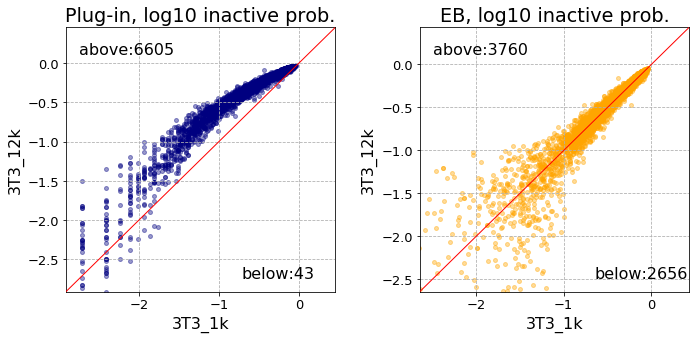

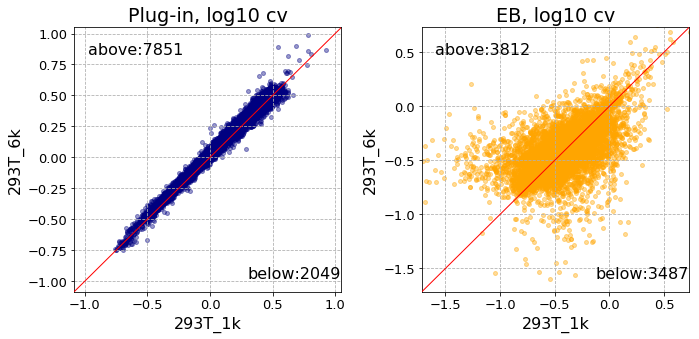

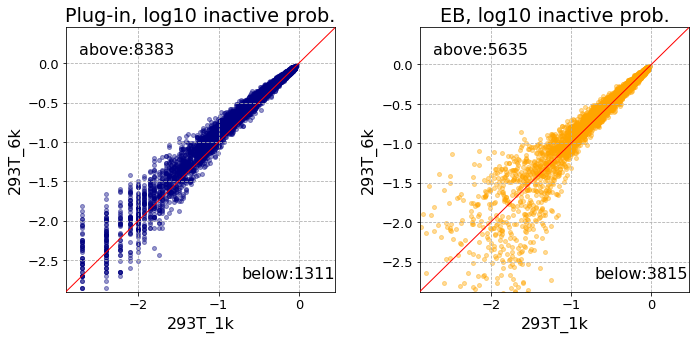

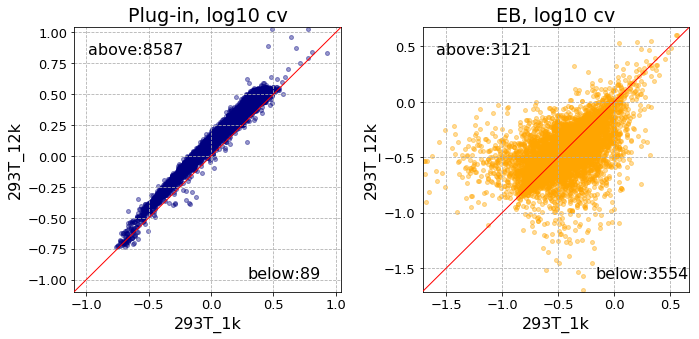

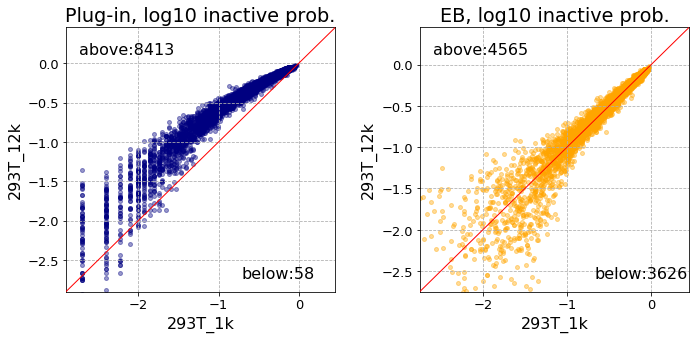

In [9]:
# plot_list = [['pbmc_8k','pbmc_4k'],['pbmc_8k','pbmc_68k'],['brain_1k','brain_2k'],['brain_1k','brain_9k'],['brain_1k','brain_1.3m']]
plot_list = [['pbmc_8k','pbmc_4k'],\
             ['brain_1k','brain_2k'],['brain_1k','brain_9k'],['brain_1k','brain_1.3m'],\
             ['3T3_1k','3T3_6k'],['3T3_1k','3T3_12k'],\
             ['293T_1k','293T_6k'],['293T_1k','293T_12k']]
for plot_param in plot_list:
    dname1,dname2 = plot_param
    gene_list_1 = gene_list[dname1]
    gene_list_2 = gene_list[dname2]

    cv_ml_1 = sd.M_to_cv(M_ml[dname1]) 
    cv_dd_1 = sd.M_to_cv(M_dd[dname1])    
    cv_ml_2 = sd.M_to_cv(M_ml[dname2])    
    cv_dd_2 = sd.M_to_cv(M_dd[dname2])
    param1 = [cv_ml_1,cv_dd_1,gene_list_1,dname1]
    param2 = [cv_ml_2,cv_dd_2,gene_list_2,dname2]
    fig_xx_two_data(param1,param2,suffix='log10 cv',output_folder=output_folder)
    
    p0_ml_1 = p0_ml[dname1]
    p0_dd_1 = p0_dd[dname1]        
    p0_ml_2 = p0_ml[dname2]
    p0_dd_2 = p0_dd[dname2]
    param1 = [p0_ml_1,p0_dd_1,gene_list_1,dname1]
    param2 = [p0_ml_2,p0_dd_2,gene_list_2,dname2]
    fig_xx_two_data(param1,param2,suffix='log10 inactive prob.',output_folder=output_folder)
    
    
